In [ ]:
from typing import Callable, Dict, Tuple
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Latex tables

def latex_table(x, f, grad):
    n=len(x)
    print("\\begin{table}[]")
    print("\\begin{tabular}{@{}llll@{}}")
    print("k & $||x\_{k+1}-x_k||$ & $||\\nabla f(x_k)||$ & $f(x_k)$ \\\\")
    print("\\midrule")
    print("1  &  %4E &  %4E   &  %4E  \\\\" % (np.linalg.norm(x[1]-x[0]),np.linalg.norm(grad(x[0])),f(x[0])))
    print("2  &  %4E &  %4E   &  %4E  \\\\" % (np.linalg.norm(x[2]-x[1]),np.linalg.norm(grad(x[1])),f(x[1])))
    print("3  &  %4E &  %4E   &  %4E  \\\\" % (np.linalg.norm(x[3]-x[2]),np.linalg.norm(grad(x[2])),f(x[2])))
    print("%d  &  %4E &  %4E   &  %4E \\\\" % (n-2,np.linalg.norm(x[n-4]-x[n-3]),np.linalg.norm(grad(x[n-3])),f(x[n-3])))
    print("%d  &  %4E &  %4E   &  %4E  \\\\" % (n-1,np.linalg.norm(x[n-3]-x[n-2]),np.linalg.norm(grad(x[n-2])),f(x[n-2])))
    print("%d  &  %4E &  %4E   &  %4E  " % (n,np.linalg.norm(x[n-2]-x[n-1]),np.linalg.norm(grad(x[n-1])),f(x[n-1])))
    print("\end{tabular}")
    print("\end{table}")
    return

In [ ]:
#@title Graficos de contornos

def make_data_grid(funct:Callable[[], np.array], 
                   start:Tuple=(-20, -20), 
                   end:Tuple=(20, 20), 
                   size:Tuple=(30, 30)) -> Tuple:
    """ Compute the contour params """
    x = np.linspace(start[0], end[0], size[0])
    y = np.linspace(start[1], end[1], size[1])
    X1, X2 = np.meshgrid(x, y)
    return X1, X2, [funct(x) for x in zip(X1, X2)]


def plot_contour(x_h:np.array,
                 funct:Callable[[], np.array], 
                 start:Tuple=(-20, -20), 
                 end:Tuple=(20, 20), 
                 size:Tuple=(30, 30)):
    """ Plot a contour graphic for 2-D function
        
        Args:
            x_h: Array with the history points to reach convergence
            start: Tuple with start range for X1 and x2
            end: Tuple with end range for X1 and x2
            size: Tuple with the sample size to create a meshgrid:

    """
    plt.figure(figsize=(12, 8))
    
    plt.title('Contour Plot')
    # Dibujamos los dos contornos para las funciones f1 y f2
    c1 = plt.contourf(*make_data_grid(funct, start=start, end=end, size=size))

    plt.clabel(c1, inline=True, fontsize=10)

    x, y = zip(*x_h)

    plt.plot(x[1:-1], y[1:-1])
    plt.plot([x[0]], [y[0]], marker='o', color='r')
    plt.plot([x[-1]], [y[-1]], marker='o', color='g')
    
    plt.legend(["Recorrido", "Punto inicial", "Punto final"])

    plt.grid(True)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    

In [ ]:
#@title Función 1

def f1(x :np.array) -> float:
    """ Compute the evaluation for Extended Rosembrock function with n=2 
        Args:
        x: Array of length=2 with x's parameters
        
        Returns:
            Evaluation of f(x1, x2)
    """
    return 100 * (x[1] - x[0]**2) + (1.0 - x[0])**2


def f1_grad(x :np.array) -> np.array:
    """ Compute the gradient evaluation for Extended Rosembrock function with n=2 
        Args:
        x: Array of length=2 with x's parameters
        
        Returns:
            Gradient of f(x1, x2), array with lenght=2
    """
    grad = np.zeros(2, dtype=np.float64)
    grad[0] = -400.0 * x[0] * x[1] + 400 * x[0]**3 + 2*x[0] - 2.0
    grad[1] = 200 * (x[1] - x[0]**2)
    return grad


def f1_hess(x :np.array) -> np.array:
    """ Compute the Hessian evaluation for Extended Rosembrock function with n=2 
        Args:
        x: Array of length=2 with x's parameters
        
        Returns:
            Hessian of f(x1, x2), Matrix with size=2x2
    """
    hess = np.zeros((2, 2), dtype=np.float64)
    hess[0][0] = 1200*x[0]**2 - 400*x[1] + 2
    hess[0][1] = hess[1][0] = -400*x[0]
    hess[1][1] = 200
    return hess


In [ ]:
#@title Función 2

def f2(x :np.array, n :int=100) -> float:
    """ Compute the evaluation for Extended Rosembrock function with n=100
        Args:
        x: Array of length=n with x's parameters
        n: Rosembrock, n = 100
        
        Returns:
            Evaluation of f(X)
    """
    ans = 0.0
    for i in range(n-1):
        ans += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return ans


def f2_grad(x :np.array, n :int=100) -> np.array:
    """ Compute the gradient evaluation for Extended Rosembrock function with n=2 
        Args:
        x: Array of length=n with x's parameters
        n: Rosembrock, n = 100
        
        Returns:
            Gradient of f(x1, ..., xn), array with lenght=n
    """
    grad = np.zeros(n, dtype=np.float64)
    for i in range(n-1):
        grad[i] = -400 * x[i+1] * x[i] + 400 * x[i]**3 + 2 * x[i] -2
    grad[n-1] = 200 * (x[n-1] - x[n-2]**2)
    return grad


def f2_hess(x :np.array, n :int=100) -> np.array:
    """ Compute the Hessian evaluation for Extended Rosembrock function with n=2 
        Args:
        x: Array of length=n with x's parameters
        
        Returns:
            Hessian of f(x1, ..., xn), Matrix with size=nxn
    """
    hess = np.zeros((n, n), dtype=np.float64)
    for i in range(n-1):
            hess[i][i] = -400 * x[i+1] + 1200 * x[i]**2 + 2
            hess[i][i+1] = -400 * x[i]
    hess[n-1][n-1] = 200.0
    return hess



In [ ]:
#@title Función 3

def f3(x :np.array) -> float:
    """ Compute the evaluation for Wood Function function with n=100
        Args:
        x: Array of length=4 with x's parameters
        
        Returns:
            Evaluation of f(X)
    """
    ans = 100 * (x[0]**2 - x[1]) + (x[0] - 1)**2 + (x[2] - 1)**2 + 90 * (x[2]**2 - x[3])**2
    ans += 10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) + 19.8 * (x[1] - 1) * (x[3] - 1)
    return ans


def f3_grad(x :np.array) -> np.array:
    """ Compute the gradient evaluation for Extended Rosembrock function with n=2 
        Args:
        x: Array of length=4 with x's parameters
        
        Returns:
            Gradient of f(x1, x2, x3, x4), array with lenght=4
    """
    grad = np.zeros(4, dtype=np.float64)
    grad[0] = 400 * x[0]**3 - 400 * x[0] * x[1] + 2 * x[0] - 2
    grad[1] = -200 * (x[0]**2 - x[1]) + 20.2 * (x[1] - 1) + 19.8 * x[3] - 19.8
    grad[2] = 2 * x[2] - 2 + 360 * x[2]**3 - 360 * x[3] * x[2]
    grad[3] = -180 * (x[2]**2 - x[3]) + 20.2 * (x[3] - 1) + 19.8 * (x[1] -1)
    return grad


def f3_hess(x :np.array) -> np.array:
    """ Compute the Hessian evaluation for Extended Rosembrock function with n=2 
        Args:
        x: Array of length=4 with x's parameters
        
        Returns:
            Hessian of f(x1, x2, x3, x4), Matrix with size=4x4
    """
    hess = np.zeros((4, 4), dtype=np.float64)
    
    hess[0][0] = 1200 * x[0]**2 - 400 * x[1] + 2
    hess[0][1] = hess[1][0] = -400 * x[0]
    hess[1][1] = hess[3][3] = 220.2
    hess[2][2] = 1080 * x[2]**2 - 360 * x[3] + 2
    hess[3][1] = hess[1][3] = 19.8
    hess[3][2] = hess[2][3] = -360 * x[2]
    
    return hess

In [ ]:
#@title Gradiente

def _back_tracking(x_k: np.array, 
                   grad_k: np.array, 
                   f :Callable[[], float], 
                   alpha:float=100.0, 
                   ro:float=0.95, 
                   c1:float=1E-4) -> float:
    """ Search by Backtraking for an step size valid """
    _alpha = alpha
    # print("alpha", _alpha)
    while f(x_k - _alpha * grad_k) > f(x_k) - c1 * _alpha * grad_k @ grad_k:
        _alpha = ro * _alpha
        # print("alpha", _alpha)
    return _alpha


def gradient_descent(x_0: np.array,
                     f: Callable[[np.array], np.array],
                     g: Callable[[np.array], np.array], 
                     H: Callable[[np.array], np.array],
                     mxitr: int=10000,
                     tol_x: float=1e-12,
                     tol_f: float=1e-12,
                     tol_g: float=1e-12,
                     msg='StepHess',
                     **kwargs):
    """ Gradient descent implementation
        
        Args:
            x_0: Start Point
            mxitr: Maximun number of iterations
            tol_x: Minimun value to reach the stopping criteria for norm(xk_1 - xk) / max(1, norm(xk)), used by default
            tol_g: Minimun value to reach the stopping criteria for norm(grad_k)
            tol_f: Minimun value to reach the stopping criteria for norm(f(xk_1) - f(xk)) / max(1, norm(f(xk)))
            f: Function to minimize
            g: Gradient of f
            h: Hessian of f
            msg: Type of computation for the step length (alpha)
                valid options are 'StepHess', 'Backtracking', 'StepFixed'
            
            alpha(float): Step size, required when 'msg'='StepFixed'
            backtraking_options(Dict): Dictionary with the Backtraking options; 'alpha', 'ro', 'c1'
            
            
        Returns:
            A tuple with the [ ||x_k+1 − x_k || ], [ f(x_k) ], [ grad(f(x_k)) ] values
            
    """
    Result = namedtuple('Result', 'x_log f_log stop_x_log stop_f_log stop_g_log')
    
    # History of values computed
    x_log = []
    f_log = []
    stop_x_log = []
    stop_f_log = []
    stop_g_log = []
    
    # Initials values
    alpha_k = kwargs.get('alpha', 0.001)
    x_k = x_0
    x_k_next = None
    
    # Stop criterias
    stop_x = lambda x_k, x_k_next: np.linalg.norm(x_k_next - x_k) / max(np.linalg.norm(x_k), 1.0)
    stop_f = lambda x_k, x_k_next, f: np.abs(f(x_k_next) - f(x_k)) / max(np.abs(f(x_k)), 1.0)
    stop_g = lambda grad_k: np.linalg.norm(grad_k)

    step = 0
    while True:
        # Compute gradient
        grad_k = g(x_k)

        # Compute step size
        if msg == 'StepHess':
            alpha_k = (grad_k @ grad_k) / (grad_k @ H(x_k) @ grad_k)
        elif msg == 'Backtracking':
            alpha_k = _back_tracking(x_k, grad_k, f, **kwargs.get('backtraking_options', {}))
        else:
            pass # value from alpha param

        # Compute next x
        x_k_next = x_k - alpha_k * grad_k
        
        # Save algorithm logs
        x_log.append(x_k)
        f_log.append(f(x_k))
        stop_x_log.append(stop_x(x_k, x_k_next))
        stop_g_log.append(stop_g(grad_k))
        stop_f_log.append(stop_f(x_k, x_k_next, f))
        
        if kwargs.get('log', False) and step % kwargs.get('step_log', 100) == 0:
            print(f_log[-1], stop_x_log[-1], stop_g_log[-1], stop_f_log[-1])

        # Stop criteria
        if mxitr < step:
            break
        if stop_x_log[-1] < tol_x:
            break
        if stop_g_log[-1] < tol_g:
            break
        if stop_f_log[-1] < tol_f:
            break

        # Update x_k
        x_k = x_k_next
        step += 1

    return Result(np.array(x_log), np.array(f_log), np.array(stop_x_log), np.array(stop_f_log), np.array(stop_g_log))


# Evaluaciónes de F1

Iterations: 4670
X* =  [1. 1.]


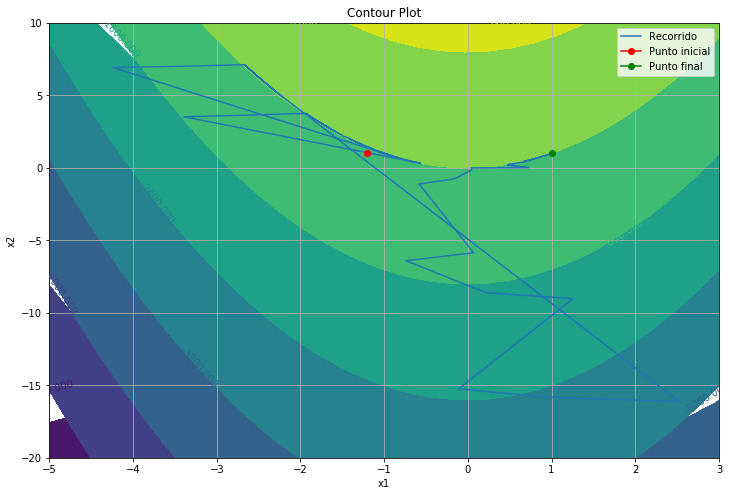

\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  1.547798E-01 &  2.328677E+02   &  -3.916000E+01  \\
2  &  2.784227E-02 &  3.094498E+01   &  -1.581861E+00  \\
3  &  1.075694E-02 &  1.948900E+00   &  4.745193E+00  \\
4668  &  3.813868E-11 &  1.637949E-09   &  -3.967826E-10 \\
4669  &  1.638340E-12 &  7.034957E-11   &  -3.076428E-11  \\
4670  &  3.090265E-11 &  1.338410E-09   &  -3.244516E-10  
\end{tabular}
\end{table}


In [18]:
#@title F1 with stepHess

x = np.array([-1.2, 1.0], dtype=np.float64)

params = {
    'x_0': x,
    'f': f1,
    'g': f1_grad,
    'H': f1_hess,
    'mxitr': 10000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'msg':'StepHess',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f1_1 = gradient_descent(**params)
print("Iterations:", len(results_f1_1.x_log))
print('X* = ', results_f1_1.x_log[-1])

plot_contour(results_f1_1.x_log, funct=f1, start=(-5, -20), end=(3, 10), size=(30, 30))

latex_table(results_f1_1.x_log, f1, f1_grad)

Iterations: 10002
X* =  [0.99996922 0.99993825]


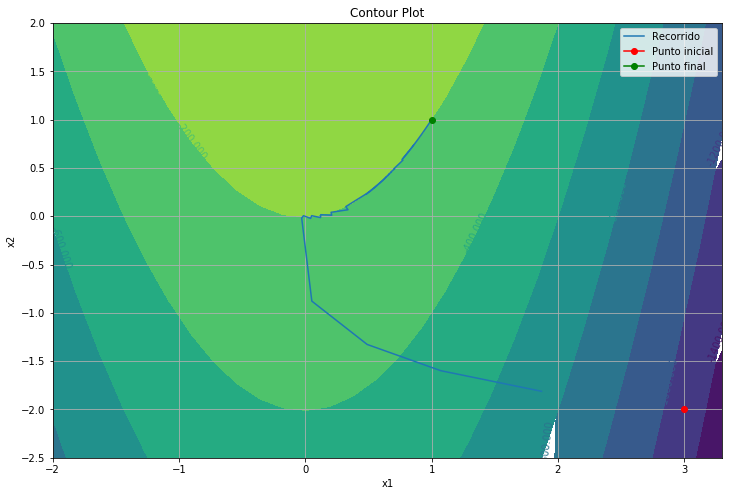

\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  1.145760E+00 &  1.338602E+04   &  -1.096000E+03  \\
2  &  8.254502E-01 &  4.111110E+03   &  -5.300356E+02  \\
3  &  6.425282E-01 &  1.300948E+03   &  -2.748457E+02  \\
10000  &  7.740560E-08 &  3.874305E-05   &  -1.841706E-05 \\
10001  &  7.850808E-08 &  3.929487E-05   &  -6.087296E-06  \\
10002  &  7.728221E-08 &  3.868129E-05   &  -1.838770E-05  
\end{tabular}
\end{table}


In [19]:
#@title F1 with stepHess x random

x = np.array([3, -2], dtype=np.float64)

params = {
    'x_0': x,
    'f': f1,
    'g': f1_grad,
    'H': f1_hess,
    'mxitr': 10000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'msg':'StepHess',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f1_1 = gradient_descent(**params)
print("Iterations:", len(results_f1_1.x_log))
print('X* = ', results_f1_1.x_log[-1])
plot_contour(results_f1_1.x_log, funct=f1, start=(-2, -2.5), end=(3.3, 2), size=(30, 30))

latex_table(results_f1_1.x_log, f1, f1_grad)

Iterations: 10002
X* =  [0.99235893 0.98474553]


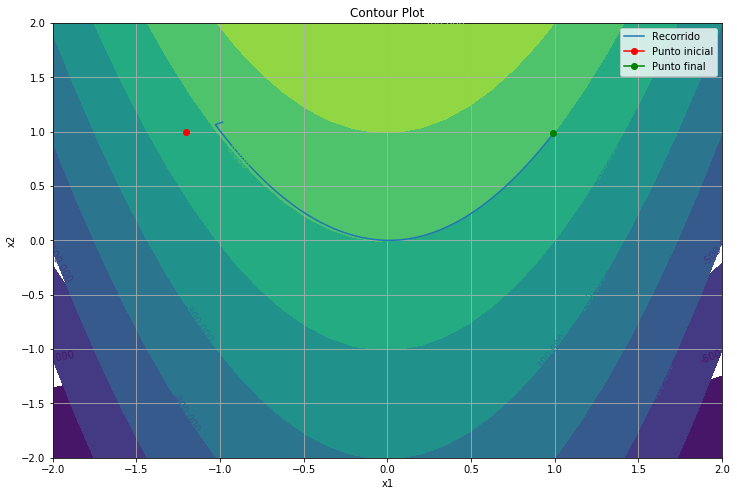

\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  1.145760E+00 &  1.338602E+04   &  -1.096000E+03  \\
2  &  8.254502E-01 &  4.111110E+03   &  -5.300356E+02  \\
3  &  6.425282E-01 &  1.300948E+03   &  -2.748457E+02  \\
10000  &  7.740560E-08 &  3.874305E-05   &  -1.841706E-05 \\
10001  &  7.850808E-08 &  3.929487E-05   &  -6.087296E-06  \\
10002  &  7.728221E-08 &  3.868129E-05   &  -1.838770E-05  
\end{tabular}
\end{table}


In [21]:
#@title F1 with step fixed

x = np.array([-1.2, 1.0], dtype=np.float64)

params = {
    'x_0': x,
    'f': f1,
    'g': f1_grad,
    'H': f1_hess,
    'mxitr': 10000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'msg':'StepFixed',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f1_2 = gradient_descent(**params)
print("Iterations:", len(results_f1_2.x_log))
print('X* = ', results_f1_2.x_log[-1])

plot_contour(results_f1_2.x_log, funct=f1, start=(-2, -2), end=(2, 2), size=(30, 30))
latex_table(results_f1_1.x_log, f1, f1_grad)

Iterations: 10002
X* =  [1.01513439 1.03055785]


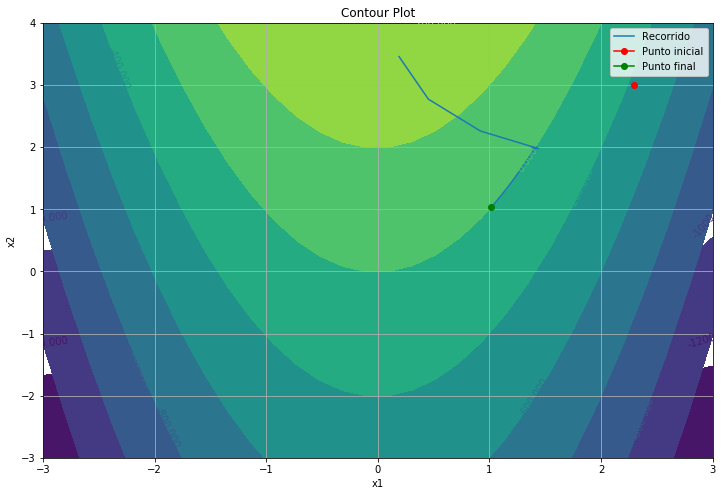

\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  1.145760E+00 &  1.338602E+04   &  -1.096000E+03  \\
2  &  8.254502E-01 &  4.111110E+03   &  -5.300356E+02  \\
3  &  6.425282E-01 &  1.300948E+03   &  -2.748457E+02  \\
10000  &  7.740560E-08 &  3.874305E-05   &  -1.841706E-05 \\
10001  &  7.850808E-08 &  3.929487E-05   &  -6.087296E-06  \\
10002  &  7.728221E-08 &  3.868129E-05   &  -1.838770E-05  
\end{tabular}
\end{table}


In [25]:
#@title F1 with step fixed x random

x = np.array([2.3, 3], dtype=np.float64)

params = {
    'x_0': x,
    'f': f1,
    'g': f1_grad,
    'H': f1_hess,
    'mxitr': 10000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'msg':'StepFixed',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f1_2 = gradient_descent(**params)
print("Iterations:", len(results_f1_2.x_log))
print('X* = ', results_f1_2.x_log[-1])

plot_contour(results_f1_2.x_log, funct=f1, start=(-3, -3), end=(3, 4), size=(30, 30))
latex_table(results_f1_1.x_log, f1, f1_grad)

Iterations: 1
X* =  [-1.2  1. ]


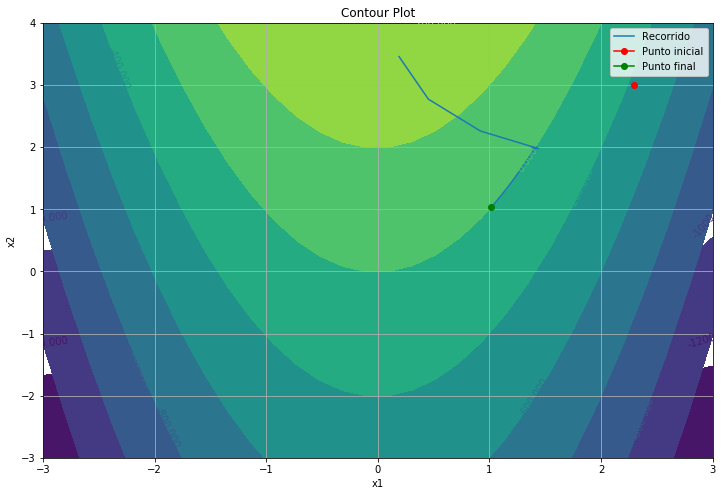

\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  1.145760E+00 &  1.338602E+04   &  -1.096000E+03  \\
2  &  8.254502E-01 &  4.111110E+03   &  -5.300356E+02  \\
3  &  6.425282E-01 &  1.300948E+03   &  -2.748457E+02  \\
10000  &  7.740560E-08 &  3.874305E-05   &  -1.841706E-05 \\
10001  &  7.850808E-08 &  3.929487E-05   &  -6.087296E-06  \\
10002  &  7.728221E-08 &  3.868129E-05   &  -1.838770E-05  
\end{tabular}
\end{table}


In [65]:
#@title F1 with step Backtracking
x = np.array([-1.2, 1.0], dtype=np.float64)

params = {
    'x_0': x,
    'f': f1,
    'g': f1_grad,
    'H': f1_hess,
    'mxitr': 100000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'alpha': 0.001,
    'msg':'Backtracking',
    'backtraking_options': {
        'alpha': 0.001, 
        'ro': 0.7,
        'c1': 0.08,
    },
}

results_f1_3 = gradient_descent(**params, log=False, step_log=2)
print("Iterations:", len(results_f1_3.x_log))
print('X* = ', results_f1_3.x_log[-1])

plot_contour(results_f1_2.x_log, funct=f1, start=(-3, -3), end=(3, 4), size=(30, 30))
latex_table(results_f1_1.x_log, f1, f1_grad)

# Evaluaciones F2

In [67]:
#@title F2 with stepHess

x = np.zeros(100, dtype=np.float64)
x[0] = x[-2] = -1.2

params = {
    'x_0': x,
    'f': f2,
    'g': f2_grad,
    'H': f2_hess,
    'mxitr': 10000,
    'tol_x': 1e-14,
    'tol_g': 1e-14,
    'tol_f': 1e-14,
    'msg':'StepHess',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f2_1 = gradient_descent(**params)
print("Iterations:", len(results_f2_1.x_log))
print('X* = ', results_f2_1.x_log[-1])

latex_table(results_f2_1.x_log, f2, f2_grad)

Iterations: 10002
X* =  [ 1.00000014  0.99999992  1.00000004  0.99999998  1.          1.
  0.99999999  1.00000001  1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          0.99999999  0.99999999  0.99999998  0.99999995  0.9999999
  0.99999981  0.99999961  0.99999922  0.99999844  0.99999688  0.99999374
  0.99998744  0.99997482  0.99994952  0.9998988   0.9997971   0.99959322
  0.99918457  0.99836573  0.99672595  0.993

In [70]:
#@title F2 with stepHess x random

x = np.random.rand(100)

params = {
    'x_0': x,
    'f': f2,
    'g': f2_grad,
    'H': f2_hess,
    'mxitr': 10000,
    'tol_x': 1e-14,
    'tol_g': 1e-14,
    'tol_f': 1e-14,
    'msg':'StepHess',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f2_1 = gradient_descent(**params)
print("Iterations:", len(results_f2_1.x_log))
print('X* = ', results_f2_1.x_log[-1])

latex_table(results_f2_1.x_log, f2, f2_grad)

Iterations: 10002
X* =  [1.00000002 1.00000001 0.99999998 1.00000003 0.99999998 1.00000001
 1.         0.99999998 1.00000003 0.99999996 1.00000004 0.99999996
 1.00000004 0.99999996 1.00000004 0.99999997 1.00000003 0.99999998
 1.00000002 0.99999999 1.00000001 0.99999999 1.00000001 0.99999999
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999998 0.99999995 0.99999991 0.99999982 0.99999964
 0.99999927 0.99999854 0.99999707 0.9999941

In [75]:
#@title F2 with step fixed

x = np.zeros(100, dtype=np.float64)
x[0] = x[-2] = -1.2

params = {
    'x_0': x,
    'f': f2,
    'g': f2_grad,
    'H': f2_hess,
    'mxitr': 10000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'msg':'StepFixed',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f2_2 = gradient_descent(**params)
print("Iterations:", len(results_f2_2.x_log))
print('X* = ', results_f2_2.x_log[-1])

latex_table(results_f2_1.x_log, f2, f2_grad)

Iterations: 10002
X* =  [-0.99497475  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  0.99999999  0.99999999  0.99999998  0.99999995  0.99999991  0.99999981
  0.99999963  0.99999925  0.9999985   0.999997    0.999993

In [74]:
#@title F2 with step fixed x random

x = np.random.rand(100)

params = {
    'x_0': x,
    'f': f2,
    'g': f2_grad,
    'H': f2_hess,
    'mxitr': 10000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'msg':'StepFixed',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f2_2 = gradient_descent(**params)
print("Iterations:", len(results_f2_2.x_log))
print('X* = ', results_f2_2.x_log[-1])

latex_table(results_f2_1.x_log, f2, f2_grad)

Iterations: 10002
X* =  [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999997 0.99999994 0.99999989
 0.99999978 0.99999956 0.99999911 0.99999822 0.99999643 0.99999285
 0.99998567 0.99997129 0.99994246 0.99988469 0.99976893 0.999537
 0.9990723

In [79]:
#@title F2 with step Backtracking

x = np.zeros(100, dtype=np.float64)
x[0] = x[-2] = -1.2

params = {
    'x_0': x,
    'f': f2,
    'g': f2_grad,
    'H': f2_hess,
    'mxitr': 100000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'alpha': 0.001,
    'msg':'Backtracking',
    'backtraking_options': {
        'alpha': 0.001, 
        'ro': 0.9,
        'c1': 0.0004,
    },
}

results_f2_3 = gradient_descent(**params, log=False, step_log=2)
print("Iterations:", len(results_f2_3.x_log))
print('X* = ', results_f2_3.x_log[-1])

latex_table(results_f2_1.x_log, f2, f2_grad)

Iterations: 11
X* =  [-0.29511747  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488  0.01824488
  0.01824488  0.01824488  0.01

# Evaluaciones F3

In [80]:
#@title F3 with stepHess

x = np.array([-3, -1, -3, -1], dtype=np.float64)

params = {
    'x_0': x,
    'f': f3,
    'g': f3_grad,
    'H': f3_hess,
    'mxitr': 10000,
    'tol_x': 1e-14,
    'tol_g': 1e-14,
    'tol_f': 1e-14,
    'msg':'StepHess',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f3_1 = gradient_descent(**params)
print("Iterations:", len(results_f3_1.x_log))
print('X* = ', results_f3_1.x_log[-1])

latex_table(results_f3_1.x_log, f3, f3_grad)

Iterations: 10002
X* =  [1.00638707 1.01280081 0.99358826 0.98719355]
\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  1.520915E+00 &  1.639713E+04   &  1.019200E+04  \\
2  &  1.064475E+00 &  4.969228E+03   &  2.672898E+03  \\
3  &  7.732140E-01 &  1.521797E+03   &  7.484454E+02  \\
10000  &  4.225988E-05 &  2.138291E-02   &  1.563470E-03 \\
10001  &  3.914430E-05 &  1.982988E-02   &  -4.854982E-03  \\
10002  &  4.214118E-05 &  2.132221E-02   &  1.558644E-03  
\end{tabular}
\end{table}


In [81]:
#@title F3 with stepHess x random

x = np.random.rand(4)

params = {
    'x_0': x,
    'f': f3,
    'g': f3_grad,
    'H': f3_hess,
    'mxitr': 10000,
    'tol_x': 1e-14,
    'tol_g': 1e-14,
    'tol_f': 1e-14,
    'msg':'StepHess',
    'alpha': 0.001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f3_1 = gradient_descent(**params)
print("Iterations:", len(results_f3_1.x_log))
print('X* = ', results_f3_1.x_log[-1])

latex_table(results_f3_1.x_log, f3, f3_grad)

Iterations: 10002
X* =  [0.99999998 0.99999996 1.00000002 1.00000004]
\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  8.344961E-01 &  2.090938E+02   &  -7.464740E+01  \\
2  &  2.139071E-01 &  2.034307E+02   &  5.124507E+01  \\
3  &  9.193321E-02 &  4.149943E+01   &  1.520606E+01  \\
10000  &  1.394707E-10 &  6.982503E-08   &  -4.675136E-09 \\
10001  &  1.284017E-10 &  6.436736E-08   &  1.632233E-08  \\
10002  &  1.390694E-10 &  6.962422E-08   &  -4.661681E-09  
\end{tabular}
\end{table}


In [89]:
#@title F3 with step fixed

x = np.array([-3, -1, -3, -1], dtype=np.float64)

params = {
    'x_0': x,
    'f': f3,
    'g': f3_grad,
    'H': f3_hess,
    'mxitr': 10000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'msg':'StepFixed',
    'alpha': 0.0001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f3_2 = gradient_descent(**params)
print("Iterations:", len(results_f3_2.x_log))
print('X* = ', results_f3_2.x_log[-1])

latex_table(results_f3_1.x_log, f3, f3_grad)

Iterations: 10002
X* =  [-0.96603336  0.94339565 -0.97145026  0.95499064]
\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  8.344961E-01 &  2.090938E+02   &  -7.464740E+01  \\
2  &  2.139071E-01 &  2.034307E+02   &  5.124507E+01  \\
3  &  9.193321E-02 &  4.149943E+01   &  1.520606E+01  \\
10000  &  1.394707E-10 &  6.982503E-08   &  -4.675136E-09 \\
10001  &  1.284017E-10 &  6.436736E-08   &  1.632233E-08  \\
10002  &  1.390694E-10 &  6.962422E-08   &  -4.661681E-09  
\end{tabular}
\end{table}


In [91]:
#@title F3 with step fixed x random

x = np.random.rand(4)

params = {
    'x_0': x,
    'f': f3,
    'g': f3_grad,
    'H': f3_hess,
    'mxitr': 10000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'msg':'StepFixed',
    'alpha': 0.0001,
    'backtraking_options': {
        'alpha': 1.0, 
        'ro': 0.95, 
        'c1': 1E-4,
    },
}

results_f3_2 = gradient_descent(**params)
print("Iterations:", len(results_f3_2.x_log))
print('X* = ', results_f3_2.x_log[-1])

latex_table(results_f3_1.x_log, f3, f3_grad)

Iterations: 10002
X* =  [1.0783332  1.16303915 0.91517768 0.83722966]
\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  8.344961E-01 &  2.090938E+02   &  -7.464740E+01  \\
2  &  2.139071E-01 &  2.034307E+02   &  5.124507E+01  \\
3  &  9.193321E-02 &  4.149943E+01   &  1.520606E+01  \\
10000  &  1.394707E-10 &  6.982503E-08   &  -4.675136E-09 \\
10001  &  1.284017E-10 &  6.436736E-08   &  1.632233E-08  \\
10002  &  1.390694E-10 &  6.962422E-08   &  -4.661681E-09  
\end{tabular}
\end{table}


In [92]:
#@title F3 with step Backtracking

x = np.array([-3, -1, -3, -1], dtype=np.float64)

params = {
    'x_0': x,
    'f': f3,
    'g': f3_grad,
    'H': f3_hess,
    'mxitr': 100000,
    'tol_x': 1e-12,
    'tol_g': 1e-12,
    'tol_f': 1e-12,
    'alpha': 0.001,
    'msg':'Backtracking',
    'backtraking_options': {
        'alpha': 0.001, 
        'ro': 0.9,
        'c1': 0.0004,
    },
}

results_f3_3 = gradient_descent(**params, log=False, step_log=2)
print("Iterations:", len(results_f3_3.x_log))
print('X* = ', results_f3_3.x_log[-1])

latex_table(results_f3_1.x_log, f3, f3_grad)

Iterations: 11
X* =  [-1.64769879  8.73138722 -1.0371736   0.94812093]
\begin{table}[]
\begin{tabular}{@{}llll@{}}
k & $||x\_{k+1}-x_k||$ & $||\nabla f(x_k)||$ & $f(x_k)$ \\
\midrule
1  &  8.344961E-01 &  2.090938E+02   &  -7.464740E+01  \\
2  &  2.139071E-01 &  2.034307E+02   &  5.124507E+01  \\
3  &  9.193321E-02 &  4.149943E+01   &  1.520606E+01  \\
10000  &  1.394707E-10 &  6.982503E-08   &  -4.675136E-09 \\
10001  &  1.284017E-10 &  6.436736E-08   &  1.632233E-08  \\
10002  &  1.390694E-10 &  6.962422E-08   &  -4.661681E-09  
\end{tabular}
\end{table}
